In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

n = 1000
X, y = make_circles(n_samples=n, factor=0.5, noise=0.05)

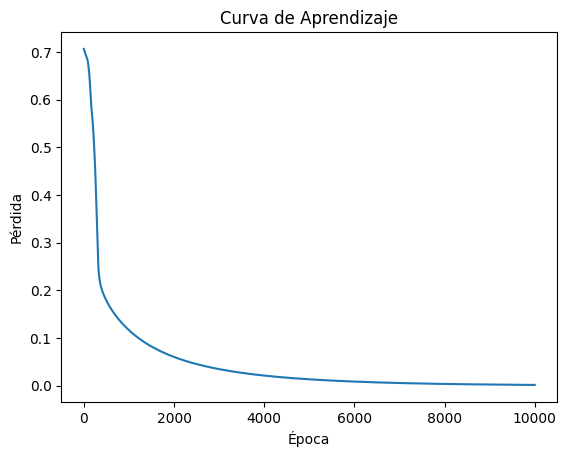

Precisión: 1.0
Precision: 1.0
Recall: 1.0
Puntuación F1: 1.0
Área bajo la curva ROC: 1.0


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Definir el modelo


class RedNeuronal(nn.Module):
    def __init__(self):
        super(RedNeuronal, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.to(self.model[0].weight.dtype)
        return self.model(x)


# Crear el modelo
model = RedNeuronal()

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Convertir los datos en tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_train = y_train.reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_test = y_test.reshape(-1, 1)
# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
losses = []
for epoch in range(10000):
    # Realizar la propagación hacia adelante
    outputs = model(X_train)

    # Calcular la pérdida
    loss = criterion(outputs, y_train)

    # Realizar la propagación hacia atrás y la actualización de los pesos
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Guardar la pérdida en cada época
    losses.append(loss.item())

# Evaluación del modelo en el conjunto de prueba
with torch.no_grad():
    y_pred = model(X_test)
    # Convertir las probabilidades en etiquetas binarias
    y_pred = (y_pred >= 0.5).float()

    accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())
    precision = precision_score(y_test.numpy(), y_pred.numpy())
    recall = recall_score(y_test.numpy(), y_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_pred.numpy())
    roc_auc = roc_auc_score(y_test.numpy(), y_pred.numpy())

# Ploteo de la curva de aprendizaje
plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Aprendizaje')
plt.show()

# Imprimir las métricas de evaluación
print(f'Precisión: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Puntuación F1: {f1}')
print(f'Área bajo la curva ROC: {roc_auc}')


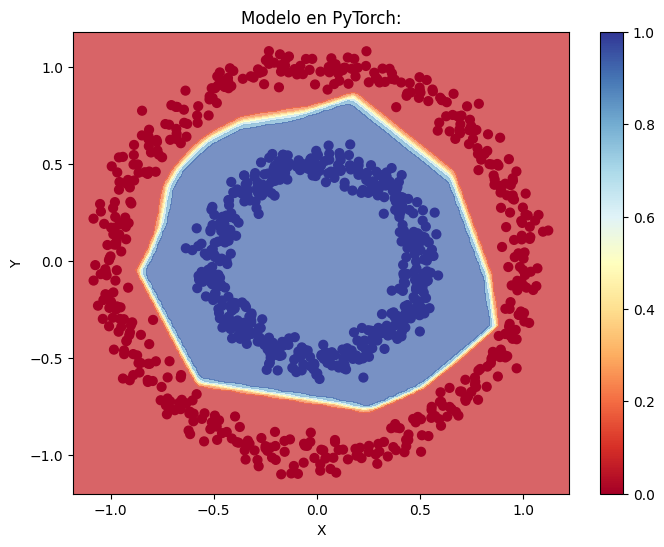

In [16]:
def plot_decision(model, X, y, title = 'Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    grid_points = np.c_[xx.ravel(), yy.ravel()]

    try:
        y_pred = model.predict(grid_points)
    except:
        x_t = torch.from_numpy(grid_points).float()
        with torch.no_grad():
            y_pred = model(x_t).detach().numpy()

    y_pred = y_pred.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(f'X')
    plt.ylabel('Y')
    plt.title(str(title))
    plt.colorbar()

plot_decision(model=model,X=X,y=y, title = 'Modelo en PyTorch:')